# Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3193,Lufthansa,TRAVEL_AND_LOCAL,3.6,14544,43M,"1,000,000+",Free,0,Everyone,Travel & Local,"July 27, 2018",7.2.5,4.1 and up
7626,AND CO,FINANCE,4.5,175,12M,"10,000+",Free,0,Everyone,Finance,"August 3, 2018",2.2.0,5.0 and up
9379,Crazy Doctor,FAMILY,4.0,267636,13M,"10,000,000+",Free,0,Teen,Role Playing,"March 3, 2014",1.5,2.1 and up
4570,Offroad Pickup Truck S,FAMILY,4.2,5178,20M,"1,000,000+",Free,0,Everyone,Simulation,"October 10, 2017",1.7,2.3 and up
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,253,3.7M,"50,000+",Free,0,Everyone,Art & Design,"November 1, 2017",1.0.0,4.0 and up


In [3]:
df['Size'].str[-1].unique()

array(['M', 'e', 'k', '+'], dtype=object)

# Data Cleaning

## 1.1 Investigation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

np.int64(483)

In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Notes
- 483 duplicated row
- `Price`, `Size`, and `Android Ver` columns are mixed with string 
    - `Size` column is in multiple units
    - `Size` and `Android Ver` columns have rows with the content "Varies with device"
- `Last Updated` column needs to be converted to date
- `Reviews` column needs to be converted to integer
- `Installs` column needs to be converted to integer with removing '+'
- `Current Ver` column won't be converted to float since it is refers to the development of each app indinvidually

## 1.2 Solving data issues

### Dropping duplicated Rows

In [7]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.duplicated().sum()

np.int64(0)

### Working with the Size column


In [8]:
df['Size'].value_counts()

Size
Varies with device    1526
11M                    188
13M                    186
12M                    186
14M                    182
                      ... 
552k                     1
885k                     1
1020k                    1
582k                     1
619k                     1
Name: count, Length: 462, dtype: int64

In [9]:
df[df['Size'].str.endswith('e')].sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2601,NFL,SPORTS,4.1,459795,Varies with device,"50,000,000+",Free,0,Everyone,Sports,"August 2, 2018",Varies with device,Varies with device
2760,Booking.com Travel Deals,TRAVEL_AND_LOCAL,4.7,1830387,Varies with device,"100,000,000+",Free,0,Everyone,Travel & Local,"August 6, 2018",Varies with device,Varies with device
716,myHomework Student Planner,EDUCATION,4.0,28392,Varies with device,"1,000,000+",Free,0,Everyone,Education,"March 7, 2018",Varies with device,Varies with device
6007,BM Box,BOOKS_AND_REFERENCE,4.3,28,Varies with device,"1,000+",Free,0,Everyone,Books & Reference,"October 20, 2016",Varies with device,Varies with device
7282,Toughest Game Ever 2,GAME,4.6,293086,Varies with device,"5,000,000+",Free,0,Everyone,Action,"October 22, 2015",8.1,4.0.3 and up


In [10]:
df[df['Size'].str.endswith('+')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### So i have noticed that this row is shifted to the right starting from the category 

In [11]:
# Fixing the shift in the row by keeping the first value which is the name then add null value to the category then the rest of the row
row = df.iloc[9990].copy()
new_row = [row[0]] + [np.nan] + list(row[1:-1])   # Takes from the second value to the one before last since the last is null
df.iloc[9990] = new_row

C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\903078688.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_row = [row[0]] + [np.nan] + list(row[1:-1])   # Takes from the second value to the one before last since the last is null
C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\903078688.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[9990] = new_row


In [12]:
df.iloc[9990]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 9990, dtype: object

- now all the values ends with 'e' which is varies with device will be replaced with NaN
- the size column will be converted to float
- The whole column will be in 'M' unit
    - M = K / 1024

In [13]:
def cleanSize(size):
    if size.endswith('e'):
        size = np.nan
        return size
    if size.endswith('k'):
        size = float(size.strip('k')) / 1024
        return size
    size = float(size.strip('M'))
    return size

df['Size'] = df['Size'].apply(cleanSize)
df['Size'].sample(20)

6587      4.600000
7653      1.800000
1894     56.000000
7424      1.600000
4523      0.072266
7740      4.500000
1932           NaN
8590      5.300000
10198     9.800000
2203      7.100000
7615     15.000000
5197     26.000000
7111     19.000000
8896     52.000000
8840           NaN
2601           NaN
5568      2.400000
6718      2.700000
10310    78.000000
3951           NaN
Name: Size, dtype: float64

In [14]:
df["Size"].isna().sum()

np.int64(1526)

- Now all the values of the Size column are float and in 'M' unit
- There is 1527 null values in the Size column

### Converting the rest of numerical columns to float

In [15]:
df['Price'].value_counts()
# this column is mostly zeros (Exactly 88%) but i will keep it cause it may give insights on other columns like intalls or rating


Price
0          9593
$0.99       146
$2.99       125
$1.99        73
$4.99        70
           ... 
$3.61         1
$394.99       1
$1.26         1
$1.20         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [16]:
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

> the `Price` column is mostly zeros (Exactly 88%) but i will keep it cause it may give insights on other columns like installs or rating

In [17]:
# Converting Price to float
df["Price"] = df["Price"].apply(lambda x : float(x.strip('$')))
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [18]:
# Converting Reviews column to float
df["Reviews"] = df['Reviews']. apply(lambda x : int(x))
df["Reviews"]

0           159
1           967
2         87510
3        215644
4           967
          ...  
10353        38
10354         4
10355         3
10356       114
10357    398307
Name: Reviews, Length: 10358, dtype: int64

In [19]:
df["Android Ver"].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

> Here i will create a new column which contains only the minimum android version needed

> Varies with device will be replaced with NaN

In [20]:
df["Android Ver"] = df["Android Ver"].replace("Varies with device", np.nan)
df["min android ver"] = df["Android Ver"].str.split().str[0]

In [21]:
df["min android ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', nan,
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '4.4W', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [22]:
df.loc[df["min android ver"] == '4.4W'].count()

App                11
Category           11
Rating              5
Reviews            11
Size               11
Installs           11
Type               11
Price              11
Content Rating     11
Genres             11
Last Updated       11
Current Ver        11
Android Ver        11
min android ver    11
dtype: int64

> The android version "4.4W" is a valid android version which is 4.4 but for smart watches so i will convert it to normal 4.4 since they are only 11 rows out of 10841 row 

In [23]:
# fixing the value 4.4W
df["min android ver"] = df["min android ver"].apply(lambda x: x.strip('W') if isinstance(x, str) else x)
df["min android ver"].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', nan,
       '2.2', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '7.1', '8.0', '3.1', '2.0.1', '1.0'], dtype=object)

> Converting it to float with neglecting the third number in the version since it is only the patch level not the version

In [24]:
df["min android ver"] = df["min android ver"].apply(lambda x: float('.'.join(x.split('.')[:2])) if isinstance(x, str) else x)
df["min android ver"].unique()

array([4. , 4.2, 4.4, 2.3, 3. , 4.1, nan, 2.2, 5. , 6. , 1.6, 1.5, 2.1,
       7. , 5.1, 4.3, 2. , 3.2, 7.1, 8. , 3.1, 1. ])

> Converting rating to float

In [25]:
df["Rating"] = df["Rating"].astype(float)
df["Rating"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10358 entries, 0 to 10357
Series name: Rating
Non-Null Count  Dtype  
--------------  -----  
8893 non-null   float64
dtypes: float64(1)
memory usage: 81.1 KB


> Converting Installs column in another column called `installs range`

In [26]:
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [27]:
df["installs range"] = df["Installs"].str.strip('+').str.replace(',', '').astype(int)
df["installs range"]

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10353        5000
10354         100
10355        1000
10356        1000
10357    10000000
Name: installs range, Length: 10358, dtype: int64

### Converting `Last Updated` to date

In [28]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df["Last Updated"]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10353   2017-07-25
10354   2018-07-06
10355   2017-01-20
10356   2015-01-19
10357   2018-07-25
Name: Last Updated, Length: 10358, dtype: datetime64[ns]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10358 non-null  object        
 1   Category         10357 non-null  object        
 2   Rating           8893 non-null   float64       
 3   Reviews          10358 non-null  int64         
 4   Size             8832 non-null   float64       
 5   Installs         10358 non-null  object        
 6   Type             10357 non-null  object        
 7   Price            10358 non-null  float64       
 8   Content Rating   10358 non-null  object        
 9   Genres           10357 non-null  object        
 10  Last Updated     10358 non-null  datetime64[ns]
 11  Current Ver      10350 non-null  object        
 12  Android Ver      9135 non-null   object        
 13  min android ver  9135 non-null   float64       
 14  installs range   10358 non-null  int64

In [30]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated,min android ver,installs range
count,8893.000000,1.035800e+04,8832.000000,10358.000000,10358,9135.000000,1.035800e+04
mean,4.187619,4.058654e+05,21.285343,1.030701,2017-11-14 09:37:38.428268032,3.853432,1.415639e+07
min,1.000000,0.000000e+00,0.008301,0.000000,2010-05-21 00:00:00,1.000000,0.000000e+00
25%,4.000000,3.200000e+01,4.700000,0.000000,2017-09-03 00:00:00,4.000000,1.000000e+03
50%,4.300000,1.678500e+03,13.000000,0.000000,2018-05-20 00:00:00,4.100000,1.000000e+05
75%,4.500000,4.640425e+04,29.000000,0.000000,2018-07-19 00:00:00,4.100000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00,8.000000,1.000000e+09
std,0.522910,2.696651e+06,22.540155,16.277843,NaN,0.842739,8.023580e+07


### Checking Consistency in categorical columns

##### Checking `Category` with it's nulls

In [31]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [32]:
df.loc[df["Category"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0,"1,000+",Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,4.0,1000


##### Checking `Type` with it's nulls

In [33]:
df["Type"].unique()

array(['Free', 'Paid', nan], dtype=object)

In [34]:
df.loc[df["Type"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
8667,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,NaN,NaN,0


#### Checking `Content Rating` with it's nulls

In [35]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

#### Checking `Genres` with it's nulls

In [36]:
df["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [37]:
df.loc[df["Genres"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,min android ver,installs range
9990,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0,"1,000+",Free,0.0,Everyone,NaN,2018-02-11,1.0.19,4.0 and up,4.0,1000


> Converting `Genres` column to hold lists of genres since they are separated with ';'

In [38]:
df["Genres"] = df["Genres"].str.split(';')
df["Genres"].sample(20)

6769                 [Lifestyle]
3879              [Productivity]
3300          [News & Magazines]
4511                 [Education]
7593                     [Tools]
951                    [Finance]
9986                 [Lifestyle]
8376                     [Tools]
6177              [Productivity]
8208             [Entertainment]
7267              [Productivity]
1118          [Health & Fitness]
1818    [Educational, Education]
3988               [Photography]
2778            [Travel & Local]
2693                    [Sports]
3791                    [Social]
3083              [Productivity]
4463                     [Tools]
1061              [Food & Drink]
Name: Genres, dtype: object

> Dropping the nulls of these columns since they have only one null per column

In [39]:
df = df.dropna(subset=(['Category', "Type", "Genres"]))

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10356 non-null  object        
 1   Category         10356 non-null  object        
 2   Rating           8892 non-null   float64       
 3   Reviews          10356 non-null  int64         
 4   Size             8831 non-null   float64       
 5   Installs         10356 non-null  object        
 6   Type             10356 non-null  object        
 7   Price            10356 non-null  float64       
 8   Content Rating   10356 non-null  object        
 9   Genres           10356 non-null  object        
 10  Last Updated     10356 non-null  datetime64[ns]
 11  Current Ver      10348 non-null  object        
 12  Android Ver      9134 non-null   object        
 13  min android ver  9134 non-null   float64       
 14  installs range   10356 non-null  int64     

In [41]:
df["Current Ver"].sample(20)

6484                1.0.16
2102               1.2.3.2
7190                 2.1.3
4815                   1.0
5758    Varies with device
3956                1.15.0
7423                 2.0.3
867     Varies with device
202     Varies with device
3924                   1.0
4346                   3.5
9283                   1.4
8058                  3.48
9899                14.0.1
9952                  2.08
2333    Varies with device
9852                  1.51
8686                2.17.1
9291                    36
1476                2.21.5
Name: Current Ver, dtype: object

In [42]:
df["Current Ver"] = df["Current Ver"].replace("Varies with device", np.nan)

#### Dealing with the nulls

In [43]:
df.isna().sum()

App                   0
Category              0
Rating             1464
Reviews               0
Size               1525
Installs              0
Type                  0
Price                 0
Content Rating        0
Genres                0
Last Updated          0
Current Ver        1309
Android Ver        1222
min android ver    1222
installs range        0
dtype: int64

In [44]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated,min android ver,installs range
count,8892.000000,1.035600e+04,8831.000000,10356.000000,10356,9134.000000,1.035600e+04
mean,4.187877,4.059438e+05,21.287413,1.030900,2017-11-14 08:53:57.079953664,3.853416,1.415913e+07
min,1.000000,0.000000e+00,0.008301,0.000000,2010-05-21 00:00:00,1.000000,0.000000e+00
25%,4.000000,3.200000e+01,4.700000,0.000000,2017-09-02 18:00:00,4.000000,1.000000e+03
50%,4.300000,1.683000e+03,13.000000,0.000000,2018-05-20 00:00:00,4.100000,1.000000e+05
75%,4.500000,4.643825e+04,29.000000,0.000000,2018-07-19 00:00:00,4.100000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00,8.000000,1.000000e+09
std,0.522377,2.696905e+06,22.540591,16.279408,NaN,0.842784,8.024331e+07


> Filling the nulls in `Rating` column with the **median** since it is not in normal distribution as the mean is so high

In [45]:
df["Rating"].fillna(df["Rating"].median(), inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\14277655.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Rating"].fillna(df["Rating"].median(), inplace=True)


> Filling the nulls in `Size` column to be the average app size

In [46]:
df["Size"].fillna(df["Size"].mean(), inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\370028815.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Size"].fillna(df["Size"].mean(), inplace=True)


> Filling the nulls in `min android ver` column with it's mode to match the versions which the most apps uses

In [47]:
df["min android ver"].fillna(df["min android ver"].mode()[0], inplace=True)

C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\8520350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["min android ver"].fillna(df["min android ver"].mode()[0], inplace=True)


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10357
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   App              10356 non-null  object        
 1   Category         10356 non-null  object        
 2   Rating           10356 non-null  float64       
 3   Reviews          10356 non-null  int64         
 4   Size             10356 non-null  float64       
 5   Installs         10356 non-null  object        
 6   Type             10356 non-null  object        
 7   Price            10356 non-null  float64       
 8   Content Rating   10356 non-null  object        
 9   Genres           10356 non-null  object        
 10  Last Updated     10356 non-null  datetime64[ns]
 11  Current Ver      9047 non-null   object        
 12  Android Ver      9134 non-null   object        
 13  min android ver  10356 non-null  float64       
 14  installs range   10356 non-null  int64     

> I am leaving the nulls in `Current Ver` and `Android Ver` since they will be dropped as they will not be usefull

### Dropping the unneeded columns

In [49]:
df = df.drop(columns=["Android Ver", "Installs"])
df.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,min android ver,installs range
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,[Art & Design],2018-06-08,NaN,4.2,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4,100000


# Answering analytical questions

### 2.1 What is the most expecsive app on the Play Store

In [50]:
df.loc[df["Price"] == df["Price"].max(),["App", "Price"]]


,App,Price
3913,I'm Rich - Trump Edition,400.0


### 2.2 Which genre has the highest number of apps

In [51]:
genre_counts = df.explode('Genres')['Genres'].value_counts()
genre_counts.head(1)

Genres
Tools    843
Name: count, dtype: int64

### 2.3 what is the average size of free vs. paid apps?

In [52]:
df_free_paid = df.groupby("Type", as_index=False)["Size"].mean()
df_free_paid

,Type,Size
0,Free,21.443305
1,Paid,19.332960


C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\306344427.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_free_paid, x = "Type", y="Size", palette="viridis")


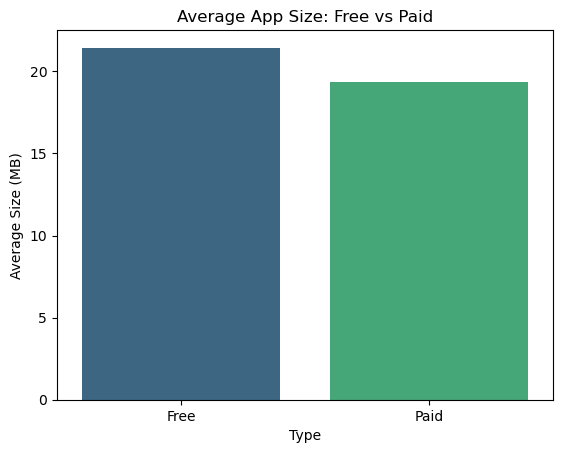

In [53]:
sns.barplot(data=df_free_paid, x = "Type", y="Size", palette="viridis")
plt.title('Average App Size: Free vs Paid')
plt.ylabel('Average Size (MB)')
plt.show()

### 2.4 What are the top 5 most expensive apps with a perfect rating (5)?

In [54]:
df_perfect = df.loc[df["Rating"] == 5].sort_values("Price", ascending=False)
df_perfect.head(5)

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,min android ver,installs range
5033,AP Art History Flashcards,FAMILY,5.0,1,96.000000,Paid,29.99,Mature 17+,[Education],2016-01-19,3.30,4.0,10
7008,USMLE Step 2 CK Flashcards,FAMILY,5.0,1,40.000000,Paid,19.99,Everyone,[Education],2014-05-26,2.47,2.2,10
5026,meStudying: AP English Lit,FAMILY,5.0,1,0.639648,Paid,4.99,Everyone,[Education],2013-08-31,1.3,2.0,10
6735,TI-84 CE Graphing Calculator Manual TI 84,FAMILY,5.0,1,27.000000,Paid,4.99,Everyone,[Education],2018-03-28,1.5.2,4.1,100
4790,Hey AJ! It's Bedtime!,FAMILY,5.0,1,63.000000,Paid,4.99,Everyone,[Education],2018-04-04,1.0.59,2.3,10


C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\997300225.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(data=df_perfect.head(5), x="App", y="Price", palette="viridis")


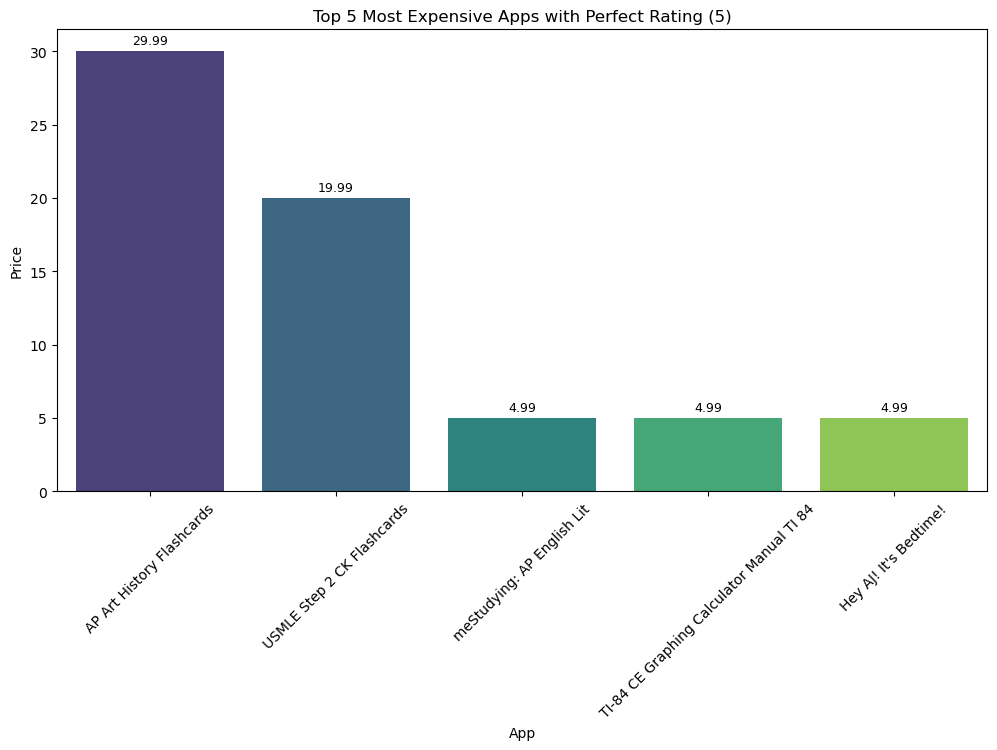

In [55]:
# fig = px.bar(
#     df_perfect.head(5),
#     x="App",
#     y="Price",
#     title="Top 5 Most Expensive Apps with Perfect Rating (5)",
#     text="Price",
# )

# fig.show()

plt.figure(figsize=(12, 6))
fig = sns.barplot(data=df_perfect.head(5), x="App", y="Price", palette="viridis")
plt.title("Top 5 Most Expensive Apps with Perfect Rating (5)")
plt.xticks(rotation=45)

for container in fig.containers:
    fig.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=3)


### 2.5	How many apps have received more than 50K reviews?

In [56]:
df.loc[df["Reviews"] > 50000].shape[0]

2525

### 2.6 What is the average price of apps, grouped by genre and number of installs?

In [57]:
df_exploded = df.explode('Genres')
df_avg_price = df_exploded.groupby(["Genres", "installs range"], as_index=False)["Price"].mean()
df_avg_price

,Genres,installs range,Price
0,Action,10,0.000000
1,Action,50,0.663333
2,Action,100,1.096000
3,Action,500,0.995000
4,Action,1000,0.372500
...,...,...,...
758,Word,100000,0.000000
759,Word,1000000,0.000000
760,Word,5000000,0.000000
761,Word,10000000,0.000000


In [58]:
df_avg_price["Genres"].nunique()

53

In [59]:
df_avg_price["installs range"].nunique()

20

In [60]:
df_avg_price["installs range"].max()

1000000000

> It can't be visualized as a whole due to the large amount of values in `Genres` and `installs range` columns, but the heat map would be the best choice if showing all of it at ince is mandatory

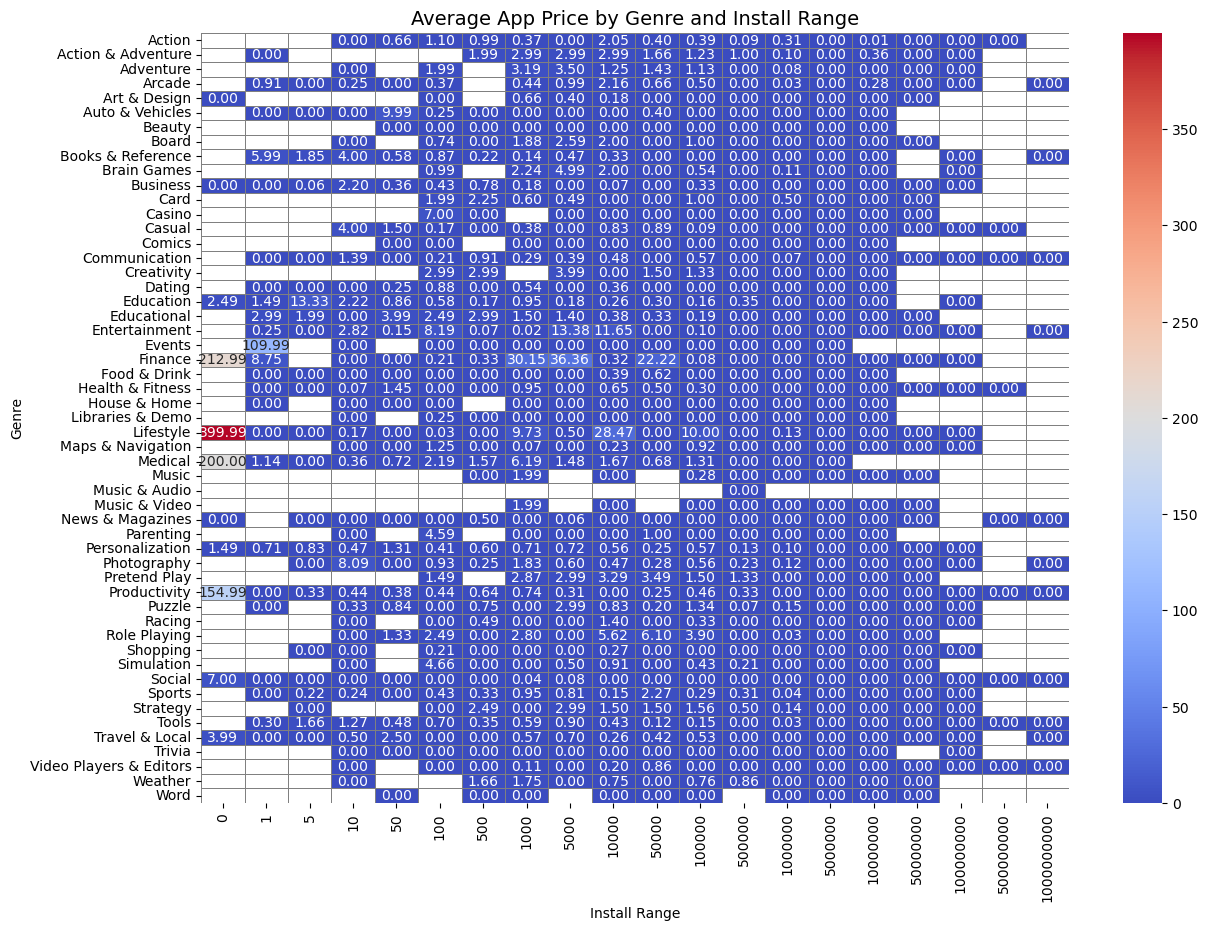

In [61]:
df_pivot = df_avg_price.pivot_table(
    index='Genres',
    columns='installs range',
    values='Price',
    # aggfunc='mean'
)
# df_pivot = df_pivot.fillna(0)


plt.figure(figsize=(14, 10))
sns.heatmap(
    df_pivot,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Average App Price by Genre and Install Range', fontsize=14)
plt.xlabel('Install Range')
plt.ylabel('Genre')
plt.show()

> Now what is more practical in this case is to separate the `Generes` column in multiple heatmap subplots so we can visualize each part of it

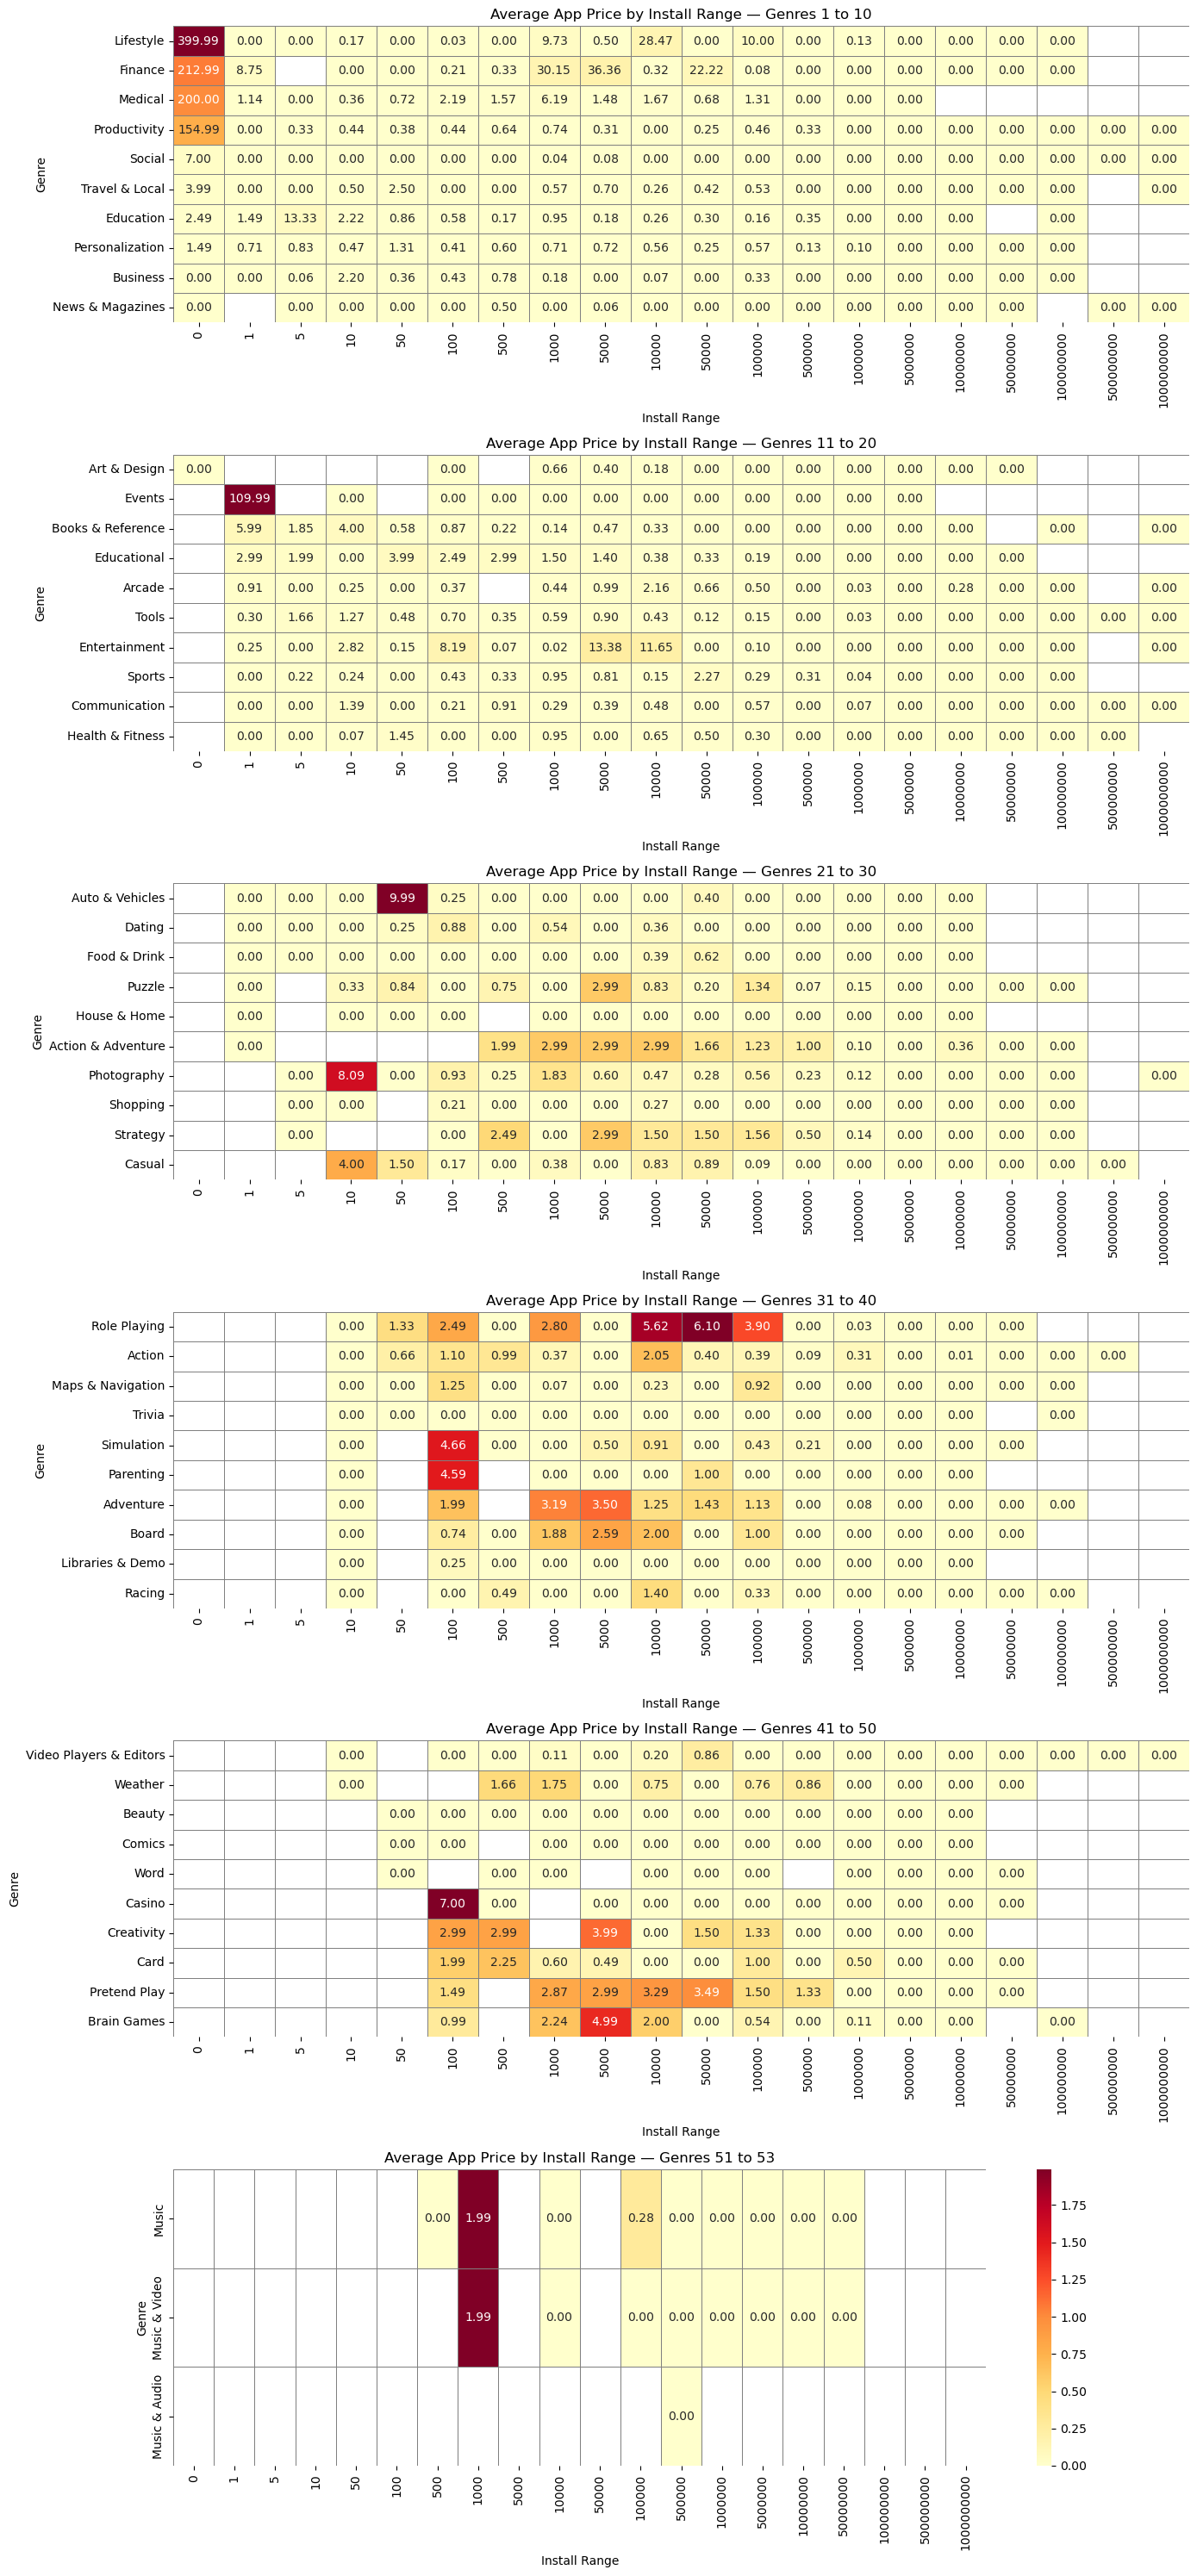

In [62]:
# Create a pivot table
df_pivot = df_avg_price.pivot_table(
    index='Genres',
    columns='installs range',
    values='Price',
    aggfunc='mean'
)

# Sort genres by average price to group them better (optional)
df_pivot = df_pivot.sort_values(df_pivot.columns.tolist(), ascending=False)

# Split genres into smaller groups (e.g., 10 per plot)
genres = df_pivot.index
n = 10  # number of genres per subplot
genre_groups = [genres[i:i+n] for i in range(0, len(genres), n)]

# Create subplots
fig, axes = plt.subplots(len(genre_groups), 1, figsize=(14, 5 * len(genre_groups)))

if len(genre_groups) == 1:
    axes = [axes]

# Plot each group
for i, group in enumerate(genre_groups):
    sns.heatmap(
        df_pivot.loc[group],
        ax=axes[i],
        cmap='YlOrRd',
        linewidths=0.5,
        linecolor='gray',
        cbar=(i == len(genre_groups) - 1),  # show colorbar only on last
        annot= True,
        fmt=".2f"
    )
    axes[i].set_title(f'Average App Price by Install Range — Genres {i*n+1} to {i*n+len(group)}', fontsize=12)
    axes[i].set_xlabel('Install Range')
    axes[i].set_ylabel('Genre')

plt.tight_layout()
plt.show()


### 2.7	How many apps have a rating higher than 4.7, and what is their average price?

In [63]:
df.loc[df["Rating"] > 4.7].shape[0]

586

In [64]:
df.loc[df["Rating"] > 4.7, ["Price"]].mean()

Price    0.455
dtype: float64

- We have 586 apps having rating higher than 4.7
- There mean price in 0.455 $

### 2.8	What is Google's estimated revenue from apps with 5,000,000+ installs?
(Assuming Google takes a 30% cut from app sales)


In [65]:
df_high_installs = df.loc[df["installs range"] >= 5000000, ["App", "installs range", "Price"]]
df_high_installs["google cut"] =df_high_installs["Price"] * 0.3 * df_high_installs["installs range"]
df_high_installs["google cut"].sum() 

np.float64(44910000.0)

- Then google's estimated revenue is at least 44910000.0$

### 2.9	What are the maximum and minimum sizes of free vs. paid apps?

In [66]:
df_size_minmax = df.groupby("Type")["Size"].agg(["min", "max"])
df_size_minmax

,min,max
Type,,
Free,0.008301,100.0
Paid,0.013672,100.0


### 2.10 Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [67]:
df_corr = df[['Rating', 'Reviews', 'Size', 'Price']]
corr = df_corr.corr()
corr

,Rating,Reviews,Size,Price
Rating,1.000000,0.063468,0.061565,-0.019708
Reviews,0.063468,1.000000,0.130486,-0.009418
Size,0.061565,0.130486,1.000000,-0.023757
Price,-0.019708,-0.009418,-0.023757,1.000000


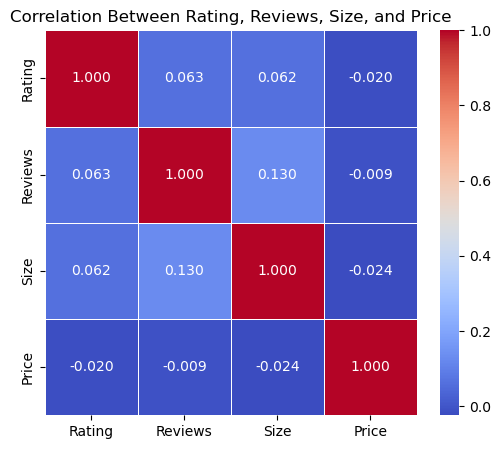

In [68]:
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Between Rating, Reviews, Size, and Price")
plt.show()

### 2.11	How many apps exist for each type (free/paid) across different content ratings?

In [69]:
df_content_count = df.groupby(['Content Rating', 'Type']).size().reset_index(name='Count')
df_content_count

,Content Rating,Type,Count
0,Adults only 18+,Free,3
1,Everyone,Free,7720
2,Everyone,Paid,662
3,Everyone 10+,Free,344
4,Everyone 10+,Paid,32
5,Mature 17+,Free,428
6,Mature 17+,Paid,19
7,Teen,Free,1094
8,Teen,Paid,52
9,Unrated,Free,2


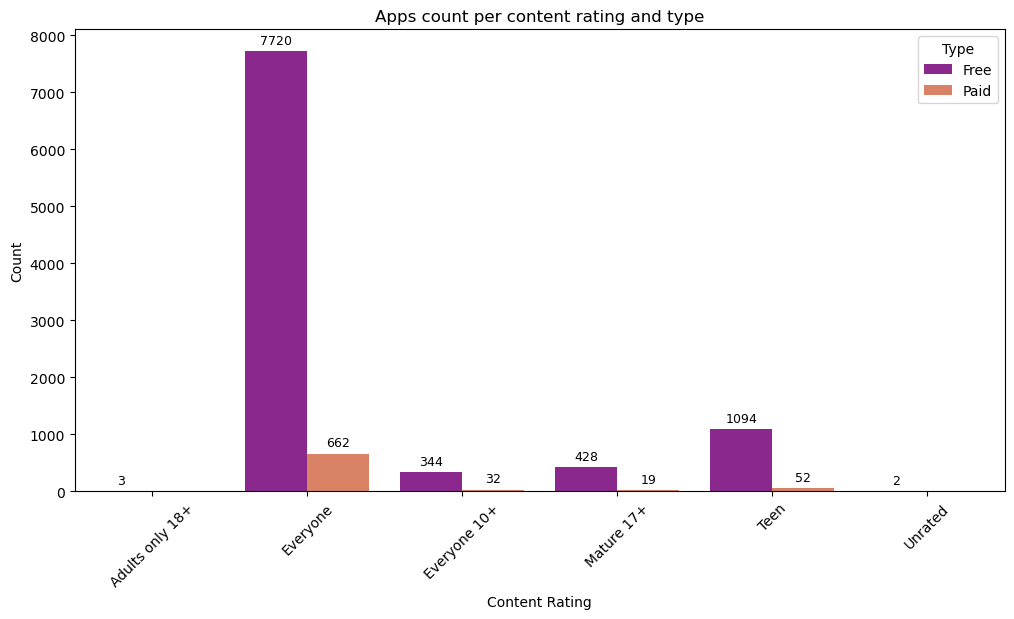

In [70]:
plt.figure(figsize=(12, 6))
fig = sns.barplot(data=df_content_count, x = "Content Rating", y= "Count", hue="Type", palette="plasma")
plt.title("Apps count per content rating and type")
plt.xticks(rotation=45)

for container in fig.containers:
    fig.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=3)

plt.show()


### 2.12	How many apps are compatible with Android version 4.x?

In [71]:
df[df["min android ver"].between(4, 5, inclusive="left")].shape[0]

7919

- So we have 7919 apps compatible with android version 7919

# 3. Detecting and handeling outliers

## 3.1 Detecting outliers

In [72]:
df.describe()

,Rating,Reviews,Size,Price,Last Updated,min android ver,installs range
count,10356.000000,1.035600e+04,10356.000000,10356.000000,10356,10356.000000,1.035600e+04
mean,4.203727,4.059438e+05,21.287413,1.030900,2017-11-14 08:53:57.079953664,3.870713,1.415913e+07
min,1.000000,0.000000e+00,0.008301,0.000000,2010-05-21 00:00:00,1.000000,0.000000e+00
25%,4.100000,3.200000e+01,5.700000,0.000000,2017-09-02 18:00:00,4.000000,1.000000e+03
50%,4.300000,1.683000e+03,17.000000,0.000000,2018-05-20 00:00:00,4.000000,1.000000e+05
75%,4.500000,4.643825e+04,26.000000,0.000000,2018-07-19 00:00:00,4.100000,1.000000e+06
max,5.000000,7.815831e+07,100.000000,400.000000,2018-08-08 00:00:00,8.000000,1.000000e+09
std,0.485617,2.696905e+06,20.814721,16.279408,NaN,0.792906,8.024331e+07


In [73]:
# Declaring numeric columns that could have outliers and taking a copy of the dataframe
num_cols = ["Rating", "Reviews", "Size", "Price", "installs range"]
df_copy = df.copy()

In [74]:
#detect outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Rating: 723 outliers
Reviews: 1870 outliers
Size: 831 outliers
Price: 765 outliers
installs range: 2566 outliers


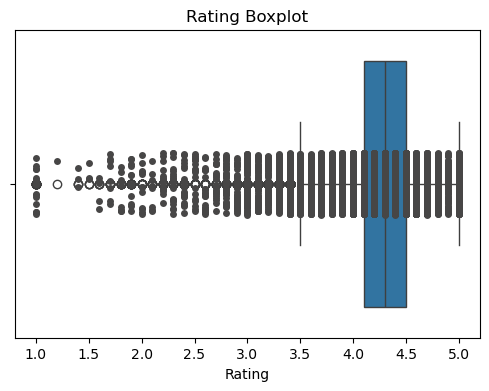

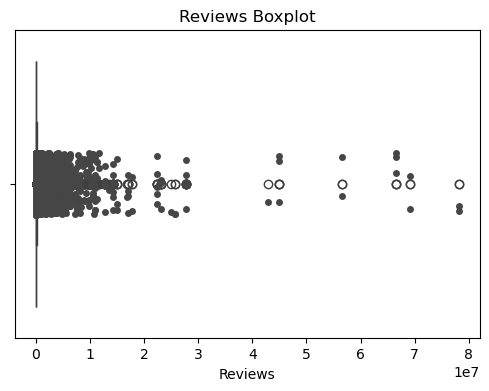

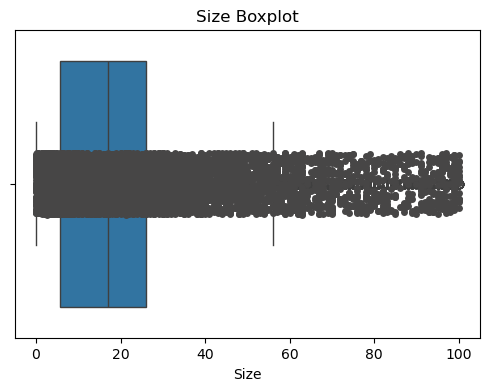

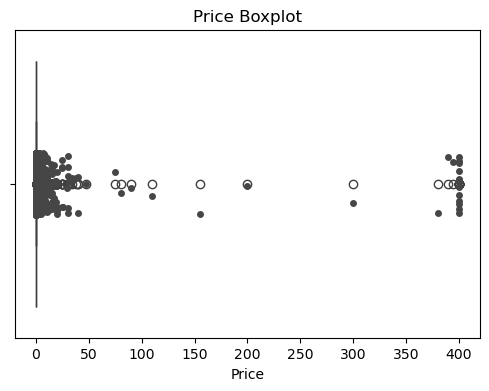

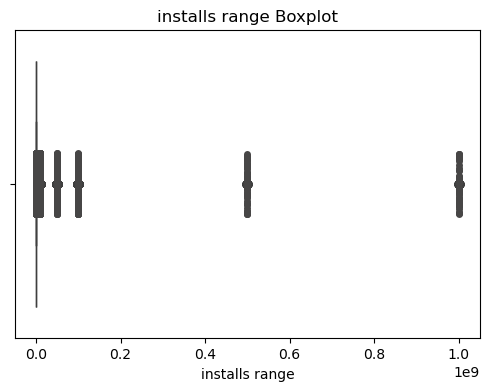

In [75]:
# Visualizing each column outliers using boxplot
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=col, data=df)
    sns.stripplot(x=col, data=df, color="#474646")
    plt.title(f"{col} Boxplot")
    plt.show()


In [76]:
df[df["Type"] == "Paid"].shape[0]

765

## 3.1 Handeling outliers

> since most of the apps are free so thier price always 0 then all paid apps are considered outliers

> So I will seperate the dataframe into free and paid

In [77]:
df_free = df[df['Type'] == 'Free']
df_paid = df[df['Type'] == 'Paid']

In [78]:
print("Free dataframe outliers")
for col in num_cols:
    Q1 = df_free[col].quantile(0.25)
    Q3 = df_free[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_free[(df_free[col] < lower) | (df_free[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

print("----------------------------")
print("Paid dataframe ouliers")
for col in num_cols:
    Q1 = df_paid[col].quantile(0.25)
    Q3 = df_paid[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_paid[(df_paid[col] < lower) | (df_paid[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Free dataframe outliers
Rating: 672 outliers
Reviews: 1704 outliers
Size: 774 outliers
Price: 0 outliers
installs range: 751 outliers
----------------------------
Paid dataframe ouliers
Rating: 71 outliers
Reviews: 135 outliers
Size: 56 outliers
Price: 75 outliers
installs range: 162 outliers


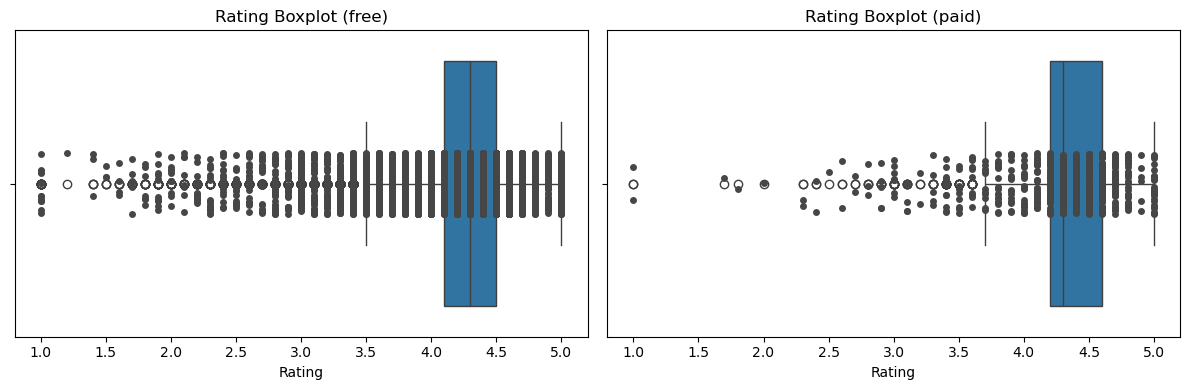

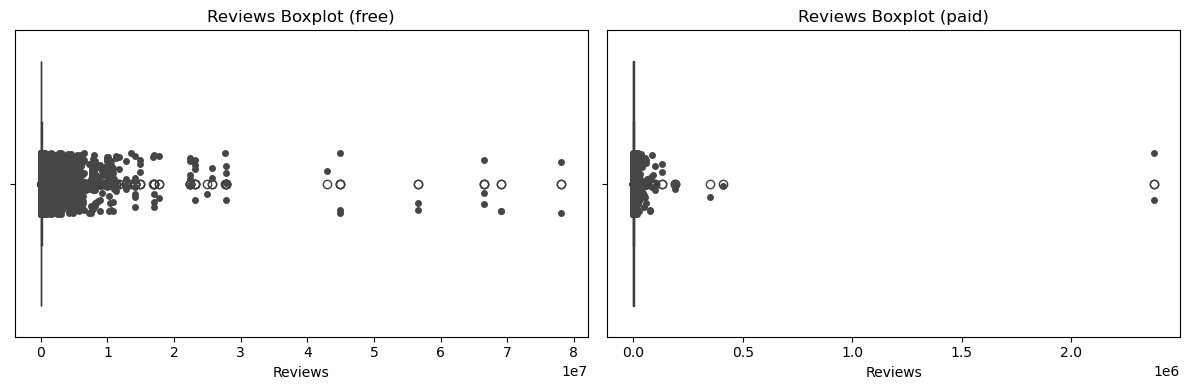

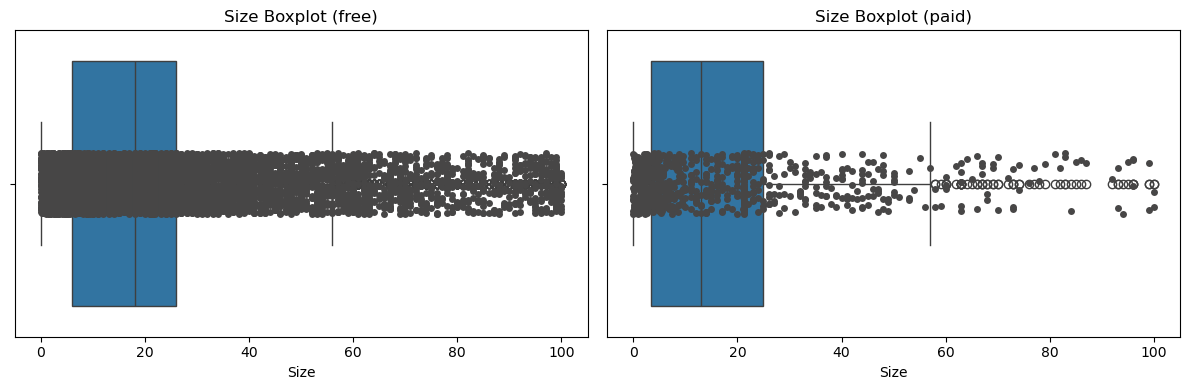

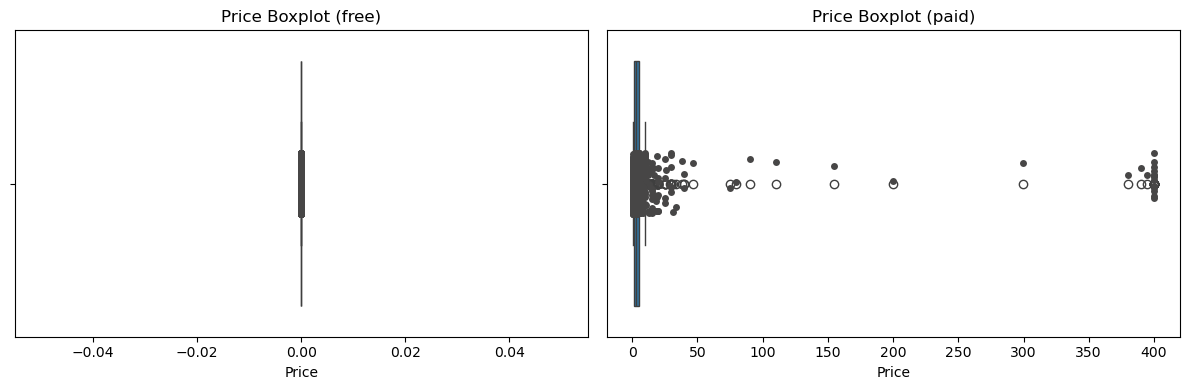

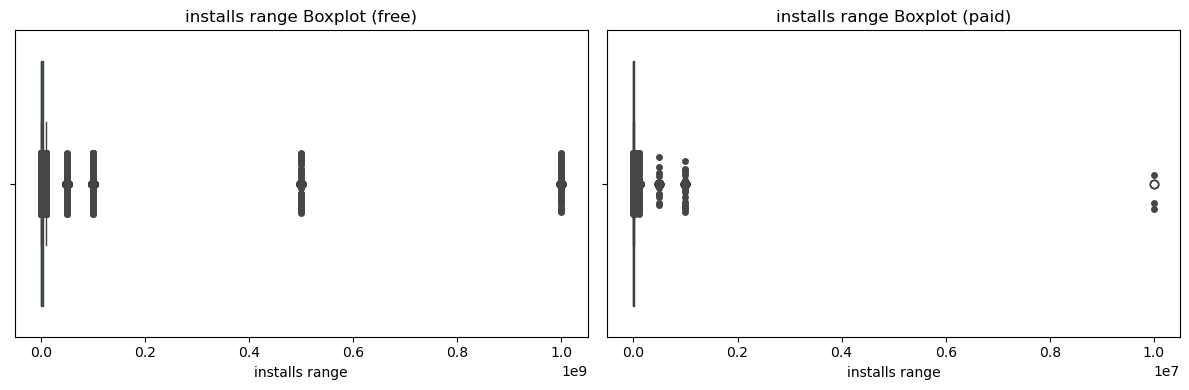

In [79]:
# Visualizing the new outliers in each dataframe using boxplot

for i in range(0, len(num_cols)):  # step by 2 each time
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # show the free columns
    sns.boxplot(x=num_cols[i], data=df_free, ax=axes[0])
    sns.stripplot(x=num_cols[i], data=df_free, ax=axes[0], color="#474646")
    axes[0].set_title(f"{num_cols[i]} Boxplot (free)")

    # Show the paid columns
    sns.boxplot(x=num_cols[i], data=df_paid, ax=axes[1])
    sns.stripplot(x=num_cols[i], data=df_paid, ax=axes[1], color="#474646")
    axes[1].set_title(f"{num_cols[i]} Boxplot (paid)")

    plt.tight_layout()
    plt.show()

> Now the data is so scattered and skewed but these are all real data so it can't be removed or imputated so i will use log trasformation to compress these values

In [80]:
log_num_cols = []

for i in df.columns:
    if pd.api.types.is_numeric_dtype(df[i]) and i != "min android ver":
        df_free[f"{i}_log"] = np.log1p(df_free[i])
        df_paid[f"{i}_log"] = np.log1p(df_paid[i])
        
        log_num_cols.append(f"{i}_log")


    # df_free["Reviews_log"] = np.log1p(df_free["Reviews"])
    # df_paid["Reviews_log"] = np.log1p(df_paid["Reviews"])
    # num_cols.append("Reviews_log")

C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\2990531691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_free[f"{i}_log"] = np.log1p(df_free[i])
C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\2990531691.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paid[f"{i}_log"] = np.log1p(df_paid[i])
C:\Users\Youssif\AppData\Local\Temp\ipykernel_8212\2990531691.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

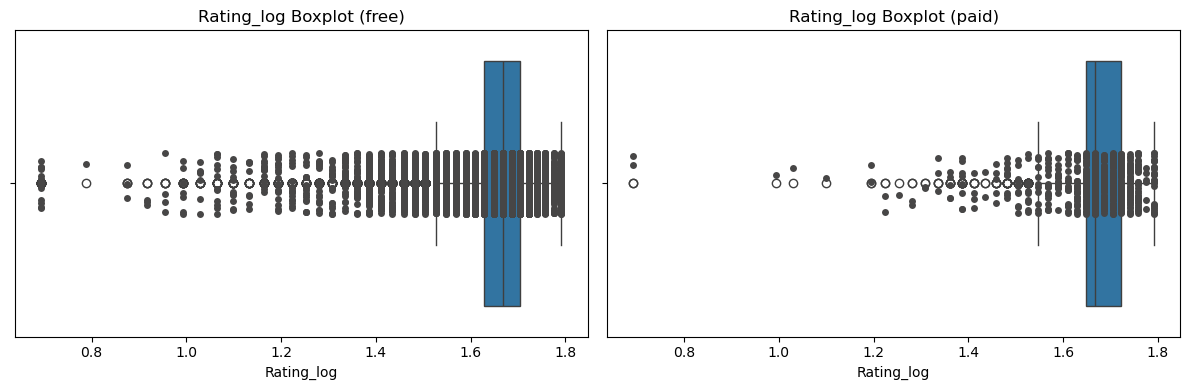

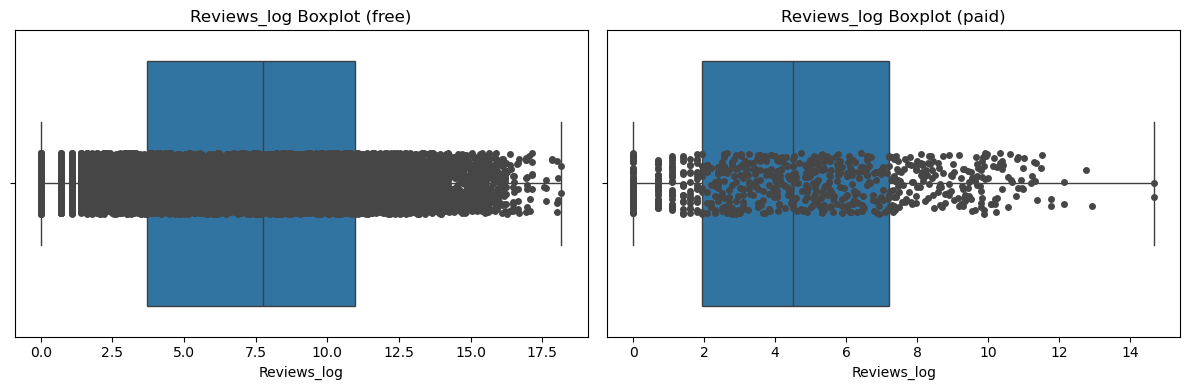

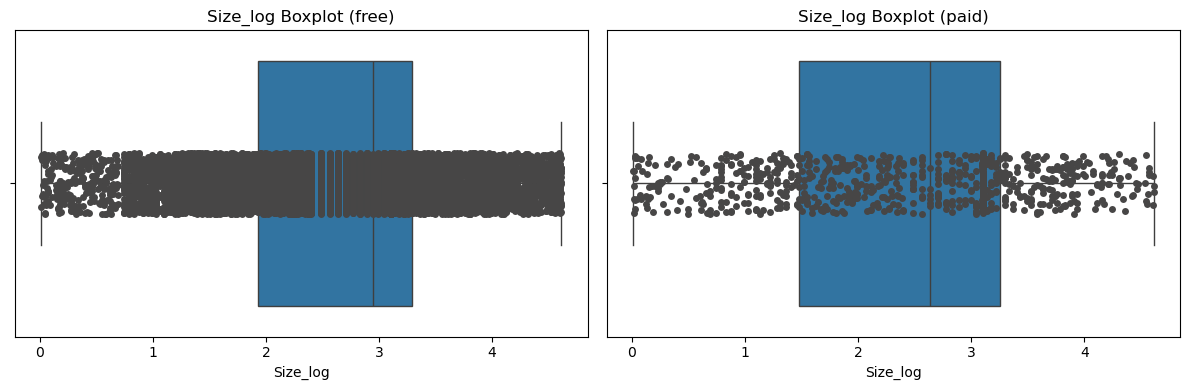

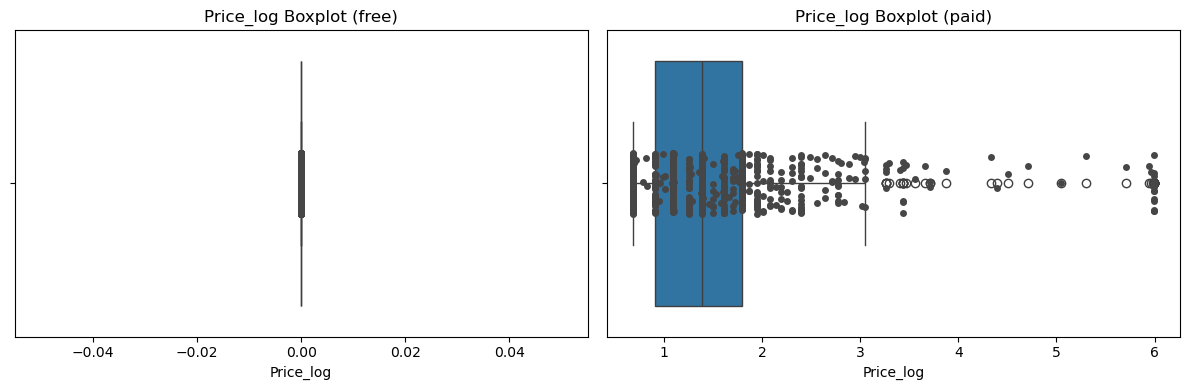

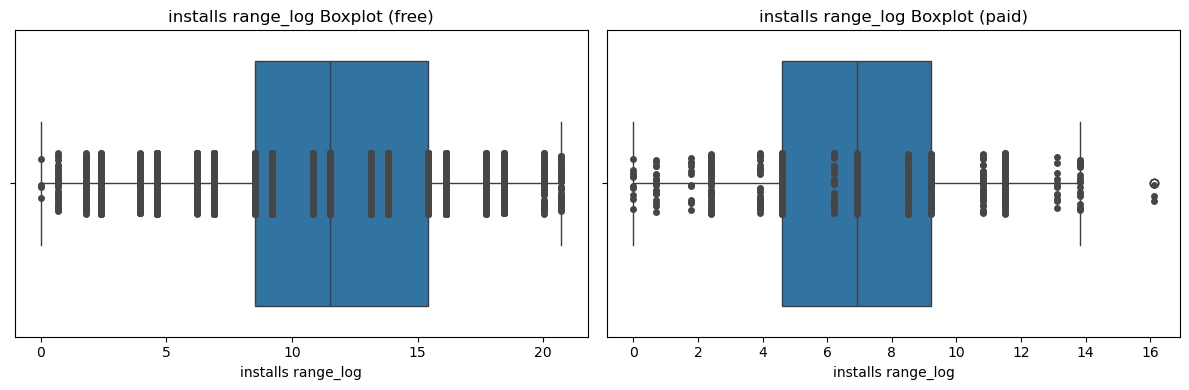

In [81]:
# Visualizing the new outliers in each dataframe using boxplot

for i in range(0, len(log_num_cols)):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # show the free columns
    sns.boxplot(x=log_num_cols[i], data=df_free, ax=axes[0])
    sns.stripplot(x=log_num_cols[i], data=df_free, ax=axes[0], color="#474646")
    axes[0].set_title(f"{log_num_cols[i]} Boxplot (free)")

    # Show the paid columns
    sns.boxplot(x=log_num_cols[i], data=df_paid, ax=axes[1])
    sns.stripplot(x=log_num_cols[i], data=df_paid, ax=axes[1], color="#474646")
    axes[1].set_title(f"{log_num_cols[i]} Boxplot (paid)")

    plt.tight_layout()
    plt.show()

In [82]:
print("Free dataframe outliers")
for col in log_num_cols:
    Q1 = df_free[col].quantile(0.25)
    Q3 = df_free[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_free[(df_free[col] < lower) | (df_free[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

print("----------------------------")
print("Paid dataframe ouliers")
for col in num_cols:
    Q1 = df_paid[col].quantile(0.25)
    Q3 = df_paid[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df_paid[(df_paid[col] < lower) | (df_paid[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

Free dataframe outliers
Rating_log: 819 outliers
Reviews_log: 0 outliers
Size_log: 0 outliers
Price_log: 0 outliers
installs range_log: 0 outliers
----------------------------
Paid dataframe ouliers
Rating: 71 outliers
Reviews: 135 outliers
Size: 56 outliers
Price: 75 outliers
installs range: 162 outliers


# Bonus
- I will continue preparing the data to use Linear Regression or Polynomial Regression models on it
- These models will be used to predict the Installs

# 4. Data Encoding and Feature Scaling

In [83]:
df_free.head()

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres,Last Updated,Current Ver,min android ver,installs range,Rating_log,Reviews_log,Size_log,Price_log,installs range_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,Free,0.0,Everyone,[Art & Design],2018-01-07,1.0.0,4.0,10000,1.629241,5.075174,2.995732,0.0,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,Free,0.0,Everyone,"[Art & Design, Pretend Play]",2018-01-15,2.0.0,4.0,500000,1.589235,6.875232,2.708050,0.0,13.122365
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,Free,0.0,Everyone,[Art & Design],2018-08-01,1.2.4,4.0,5000000,1.740466,11.379520,2.272126,0.0,15.424949
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,Free,0.0,Teen,[Art & Design],2018-06-08,NaN,4.2,50000000,1.704748,12.281389,3.258097,0.0,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,Free,0.0,Everyone,"[Art & Design, Creativity]",2018-06-20,1.1,4.4,100000,1.667707,6.875232,1.335001,0.0,11.512935


### 4.1 Dropping un-needed columns in `df_free` and `df_paid`

In [84]:
# def replace_outliers(col):
#     """
#     Replaces outliers in a pandas Series with median using IQR method.
#     """
#     Q1 = col.quantile(0.25)
#     Q3 = col.quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     median = col.mean()
    
#     # Use vectorized operation instead of apply
#     col = col.where((col >= lower_bound) & (col <= upper_bound), median)
#     return col

# # Example usage
# df_paid['Rating_log'] = replace_outliers(df_paid['Rating_log'])
# df_free['Rating_log'] = replace_outliers(df_free['Rating_log'])
# df_paid['Price_log'] = replace_outliers(df_paid['Price_log'])

In [85]:
df_free = df_free.drop(columns=["App","Rating", "Reviews", "Size", "Type", "Price", "Last Updated", "Current Ver", "installs range", "Price_log", "Rating_log"])
df_paid = df_paid.drop(columns=["App","Rating", "Reviews", "Size", "Type", "Price", "Last Updated", "Current Ver", "installs range", "Price_log", "Rating_log"])

> Here i dropped some columns like `Rating_log` and `Price_log` because they have so much outliers which will mess up the models

In [86]:
df_free.head()

,Category,Content Rating,Genres,min android ver,Reviews_log,Size_log,installs range_log
0,ART_AND_DESIGN,Everyone,[Art & Design],4.0,5.075174,2.995732,9.210440
1,ART_AND_DESIGN,Everyone,"[Art & Design, Pretend Play]",4.0,6.875232,2.708050,13.122365
2,ART_AND_DESIGN,Everyone,[Art & Design],4.0,11.379520,2.272126,15.424949
3,ART_AND_DESIGN,Teen,[Art & Design],4.2,12.281389,3.258097,17.727534
4,ART_AND_DESIGN,Everyone,"[Art & Design, Creativity]",4.4,6.875232,1.335001,11.512935


In [87]:
df_paid.head()

,Category,Content Rating,Genres,min android ver,Reviews_log,Size_log,installs range_log
233,BUSINESS,Everyone,[Business],4.0,9.345133,2.054124,11.512935
234,BUSINESS,Everyone,[Business],3.0,9.239511,3.688879,11.512935
390,COMMUNICATION,Everyone,[Communication],4.1,9.811811,3.104022,11.512935
429,DATING,Mature 17+,[Dating],4.1,7.343426,3.104022,9.210440
430,DATING,Everyone,[Dating],4.0,4.060443,1.974081,6.908755


### 4.2 Encoding categorial columns

> Using binary encoding on `Category` and `Content Rating`

In [88]:
from category_encoders import BinaryEncoder

encoder = BinaryEncoder()
cols = ["Category", "Content Rating"]

encoder = BinaryEncoder(cols=cols)
free_binary_encoded = encoder.fit_transform(df_free[cols])
paid_binary_encoded = encoder.fit_transform(df_paid[cols])

In [89]:
free_encoded_df =pd.concat([df_free, free_binary_encoded], axis=1).drop(columns = ["Category", "Content Rating"])
paid_encoded_df =pd.concat([df_paid, paid_binary_encoded], axis=1).drop(columns = ["Category", "Content Rating"])

In [90]:
free_encoded_df.head()

,Genres,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Content Rating_0,Content Rating_1,Content Rating_2
0,[Art & Design],4.0,5.075174,2.995732,9.210440,0,0,0,0,0,1,0,0,1
1,"[Art & Design, Pretend Play]",4.0,6.875232,2.708050,13.122365,0,0,0,0,0,1,0,0,1
2,[Art & Design],4.0,11.379520,2.272126,15.424949,0,0,0,0,0,1,0,0,1
3,[Art & Design],4.2,12.281389,3.258097,17.727534,0,0,0,0,0,1,0,1,0
4,"[Art & Design, Creativity]",4.4,6.875232,1.335001,11.512935,0,0,0,0,0,1,0,0,1


In [91]:
paid_encoded_df.head()

,Genres,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Content Rating_0,Content Rating_1,Content Rating_2
233,[Business],4.0,9.345133,2.054124,11.512935,0,0,0,0,1,0,0,1
234,[Business],3.0,9.239511,3.688879,11.512935,0,0,0,0,1,0,0,1
390,[Communication],4.1,9.811811,3.104022,11.512935,0,0,0,1,0,0,0,1
429,[Dating],4.1,7.343426,3.104022,9.210440,0,0,0,1,1,0,1,0
430,[Dating],4.0,4.060443,1.974081,6.908755,0,0,0,1,1,0,0,1


> Encoding `Genres` column using multi label binarizer since it contains lists of genres
- it will increase the data size significantly because we have over 50 different genres

In [92]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

mlb.fit(pd.concat([free_encoded_df['Genres'], paid_encoded_df['Genres']]))

# Encoding
free_genres_encoded = mlb.transform(free_encoded_df['Genres'])
paid_genres_encoded = mlb.transform(paid_encoded_df['Genres'])

# Converting to dataframes
free_genres_df = pd.DataFrame(free_genres_encoded, columns=mlb.classes_, index=df_free.index)
paid_genres_df = pd.DataFrame(paid_genres_encoded, columns=mlb.classes_, index=df_paid.index)

# Merging data
free_encoded_df = pd.concat([free_encoded_df.reset_index(drop=True), free_genres_df.reset_index(drop=True)], axis=1).drop(columns=["Genres"])
paid_encoded_df = pd.concat([paid_encoded_df.reset_index(drop=True), paid_genres_df.reset_index(drop=True)], axis=1).drop(columns=["Genres"])


In [93]:
free_encoded_df.head()

,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,5.075174,2.995732,9.210440,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,6.875232,2.708050,13.122365,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.0,11.379520,2.272126,15.424949,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.2,12.281389,3.258097,17.727534,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.4,6.875232,1.335001,11.512935,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [94]:
paid_encoded_df.head()

,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Content Rating_0,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,9.345133,2.054124,11.512935,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,9.239511,3.688879,11.512935,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.1,9.811811,3.104022,11.512935,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,7.343426,3.104022,9.210440,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,4.060443,1.974081,6.908755,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


### 4.3 Feature Scaling for numeric columns using MinMax Scaler

- `min android ver` column won't get scaled or mapped as it already represent ordinal data  not just numbers
- We will use a model to predict the installs so it wouldn't get scaled

In [95]:
from sklearn.preprocessing import MinMaxScaler

cols = ["Reviews_log", "Size_log"]
scaler = MinMaxScaler()

# Encoding free apps
scaler.fit(free_encoded_df[cols])

df_processed_free = free_encoded_df.copy()
df_processed_free[cols] = scaler.transform(free_encoded_df[cols])


# Encoding paid apps
# cols.append("Price_log")

scaler.fit(paid_encoded_df[cols])

df_processed_paid = paid_encoded_df.copy()
df_processed_paid[cols] = scaler.transform(paid_encoded_df[cols])


In [96]:
df_processed_free.head()

,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,0.279251,0.648483,9.210440,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0.378295,0.586036,13.122365,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.0,0.626134,0.491411,15.424949,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4.2,0.675758,0.705434,17.727534,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.4,0.378295,0.287991,11.512935,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_processed_paid.head()

,min android ver,Reviews_log,Size_log,installs range_log,Category_0,Category_1,Category_2,Category_3,Category_4,Content Rating_0,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,0.636539,0.443448,11.512935,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0.629344,0.798711,11.512935,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4.1,0.668326,0.671610,11.512935,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,0.500194,0.671610,9.210440,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0.276575,0.426053,6.908755,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Train-Test Split

> I will split the data to use linear regression on it to predict the amount of installs

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_free = df_processed_free.drop("installs range_log", axis = 1)
x_paid = df_processed_paid.drop("installs range_log", axis = 1)
x_free.head(1)

,min android ver,Reviews_log,Size_log,Category_0,Category_1,Category_2,Category_3,Category_4,Category_5,Content Rating_0,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,0.279251,0.648483,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
x_paid.head()

,min android ver,Reviews_log,Size_log,Category_0,Category_1,Category_2,Category_3,Category_4,Content Rating_0,Content Rating_1,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
0,4.0,0.636539,0.443448,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,0.629344,0.798711,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.1,0.668326,0.671610,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,0.500194,0.671610,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4.0,0.276575,0.426053,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
y_free = y = df_processed_free['installs range_log']
y_paid = y = df_processed_paid['installs range_log']



In [102]:
# Splitting free apps
x_train_free, x_test_free, y_train_free, y_test_free = train_test_split(x_free, y_free, test_size = 0.2, random_state = 42)

# Splitting paid apps
x_train_paid, x_test_paid, y_train_paid, y_test_paid = train_test_split(x_paid, y_paid, test_size = 0.2, random_state = 42)

# 6. Modeling

## 6.1 Linear Regression

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [104]:
lr = LinearRegression()
# Modeling the free apps
lr.fit(x_train_free, y_train_free)

y_pred_free = lr.predict(x_test_free)
mse = mean_squared_error(y_test_free, y_pred_free)
r2 = r2_score(y_test_free, y_pred_free)

print ("Mean Squared Error:", mse)
print ("R2:", r2)

Mean Squared Error: 1.257636859698985
R2: 0.9367178723711989


In [105]:
lr = LinearRegression()
# Modeling the paid apps
lr.fit(x_train_paid, y_train_paid)

y_pred_paid = lr.predict(x_test_paid)
mse = mean_squared_error(y_test_paid, y_pred_paid)
r2 = r2_score(y_test_paid, y_pred_paid)

print ("Mean Squared Error:", mse)
print ("R2:", r2)

Mean Squared Error: 1.2081623540910078
R2: 0.9037057314543868


## 6.2 Polynomial Regression

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [107]:
# Free
poly_free = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_free.fit(x_train_free, y_train_free)
y_poly_pred_free = poly_free.predict(x_test_free)

# Paid
poly_paid = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_paid.fit(x_train_paid, y_train_paid)
y_poly_pred_paid = poly_paid.predict(x_test_paid)


## 6.3 Models Evaluation

In [108]:
def evaluate_model(y_true, y_pred, label=""):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} \nMSE: {mse:.4f}, \nR2: {r2:.4f}")
    print("")

# Linear regression
evaluate_model(y_test_free, y_pred_free, "Linear Regression Free")
evaluate_model(y_test_paid, y_pred_paid, "Linear Regression Paid")


# Polynomial Regression
evaluate_model(y_test_free, y_poly_pred_free, "Polynomial Regression Free")
evaluate_model(y_test_paid, y_poly_pred_paid, "Polynomial Regression Paid")


Linear Regression Free 
MSE: 1.2576, 
R2: 0.9367

Linear Regression Paid 
MSE: 1.2082, 
R2: 0.9037

Polynomial Regression Free 
MSE: 1.1272, 
R2: 0.9433

Polynomial Regression Paid 
MSE: 4.5425, 
R2: 0.6379

